In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv


In [2]:
df = pd.concat((pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,),
                pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,)))

# **RQ-3**

For each category, what’s the brand whose prices are higher on average?
* Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
* Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [3]:
#New columns need to be created to have general category
df['category'] = df.apply( lambda x : x['category_code'].split('.')[0] if pd.notna(x['category_code']) else x['category_code'], axis = 1)

#Gruopbying by category and brand then calculating mean price for every brand under categories
pmb = df.groupby([df['category'], df['brand']]).agg(mean = ('price', 'mean'))

#Sorting the mean price by applying lambda fuction
pmb.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('mean', ascending=False))

mean
category    brand                 
accessories weekend     623.120769
            coccinelle  305.220952
            dometic     268.199608
            omabelle    203.431176
            samsonite   193.745909
...                            ...
stationery  barer         8.562778
            premier       8.203333
            europrint     7.269167
            colorfix      5.460000
            crown         4.790000

[1842 rows x 1 columns]

**Please see the brands and their average prices for each category above. They have been sorted to show which are higher.**

['electronics' 'appliances' nan 'computers' 'furniture' 'apparel'
 'construction' 'auto' 'accessories' 'kids' 'sport' 'medicine'
 'country_yard' 'stationery']
Please enter the name of category: electronics


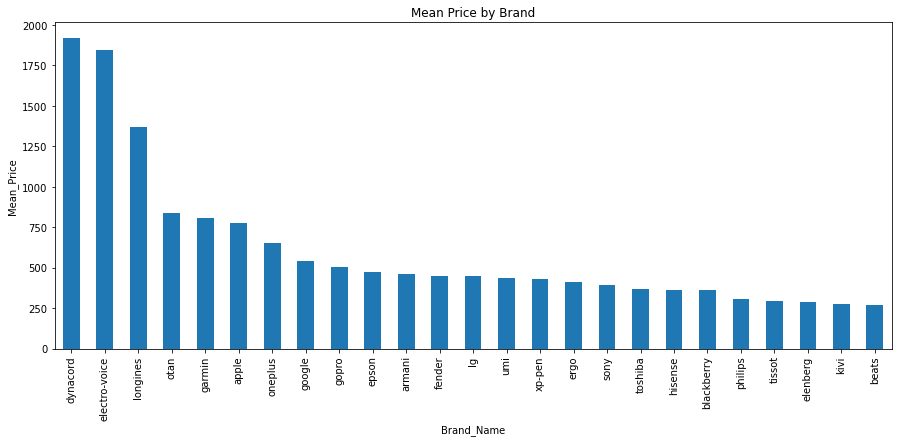

In [4]:
#Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
df = df[~df.index.duplicated()]
import matplotlib.pyplot as plt
def price_mean_by_brand(name_of_category):

    df[(df.category == name_of_category) & (df.event_type == 'purchase')].groupby([df.brand]).price.mean().sort_values(ascending = False).nlargest(25).plot.bar(figsize=(15,6),
                                                                                                                                                                title = 'Mean Price by Brand',
                                                                                                                                                                ylabel = 'Mean_Price',
                                                                                                                                                                xlabel = 'Brand_Name')

print(df['category'].unique())

name_of_category = input('Please enter the name of category: ')
price_mean_by_brand(name_of_category)

**Please see the above codes and graph which asks the user to enter the category name and return the plot for mean price of all brands as sorted.**

In [5]:
#Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.
#By applying the lambda fuction the result can be returned easily

pmb.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('mean', ascending=False).head(1)).sort_values('mean', ascending = True)

,,mean
category,brand,
medicine,gamma,50.268462
stationery,xerox,66.670000
apparel,weekend,497.479083
accessories,weekend,623.120769
country_yard,viking,733.984667
furniture,laufen,1031.394545
auto,schneider,1220.173226
construction,senci,1272.812647
computers,apple,1607.083053


**Please see the brands with the highest average mean price for each category in ascending order above.**